In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("/content/Sample - Superstore1.xlsx", sheet_name="Orders")

In [3]:
print("Shape:", df.shape)
df.head()

Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Ca

In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)
print("\nAfter removing duplicates:", df.shape)


After removing duplicates: (9994, 21)


In [7]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"🏆 Total Profit: ${total_profit:,.2f}")
print(f"📦 Total Orders: {total_orders}")
print(f"📈 Average Profit Margin: {avg_profit_margin:.2f}%")


💰 Total Sales: $2,297,200.86
🏆 Total Profit: $286,397.02
📦 Total Orders: 5009
📈 Average Profit Margin: 12.47%


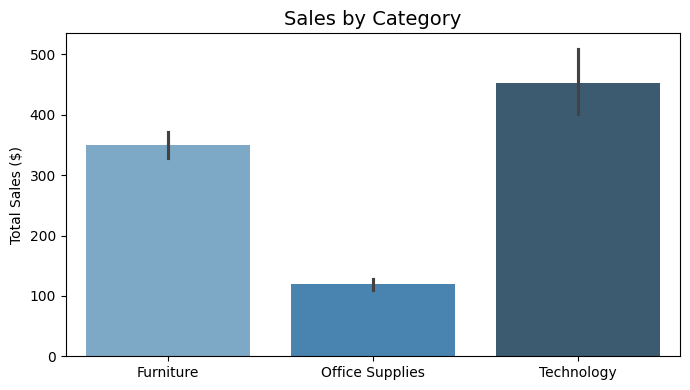

In [8]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Category', y='Sales', palette='Blues_d')
plt.title("Sales by Category", fontsize=14)
plt.xlabel("")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

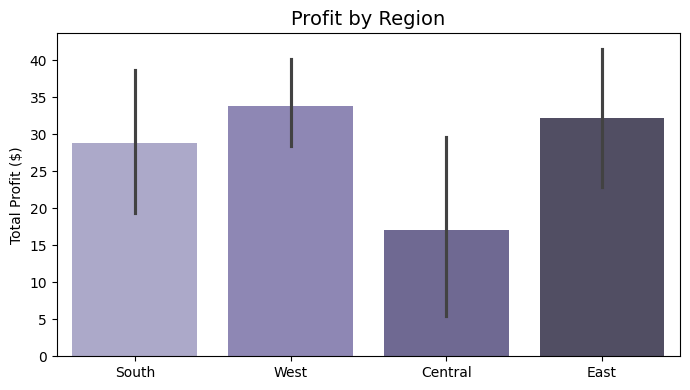

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Region', y='Profit', palette='Purples_d')
plt.title("Profit by Region", fontsize=14)
plt.xlabel("")
plt.ylabel("Total Profit ($)")
plt.tight_layout()
plt.show()

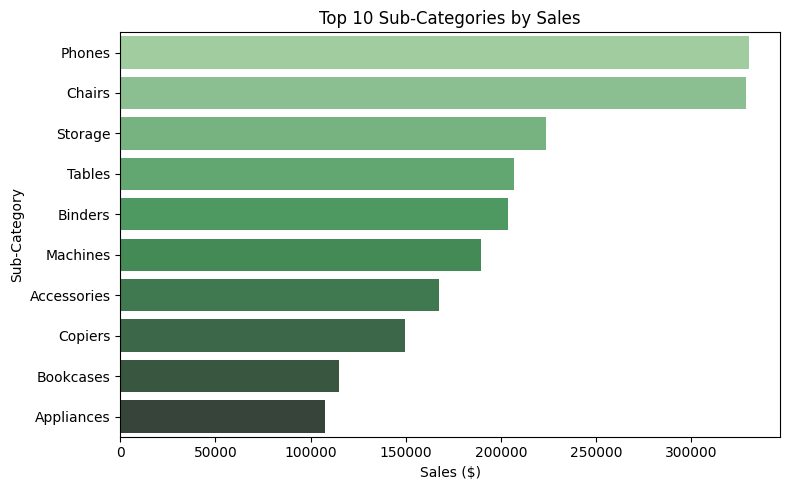

In [10]:
top_subcats = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='Greens_d')
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sales ($)")
plt.tight_layout()
plt.show()

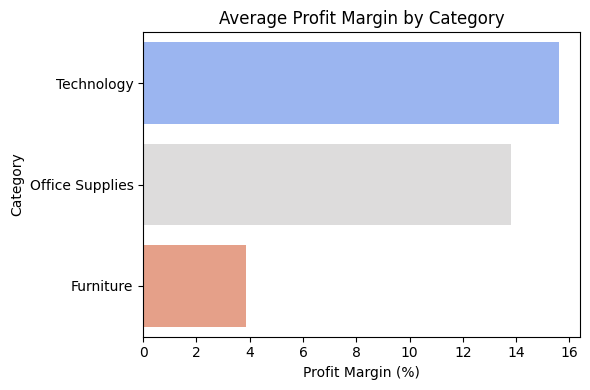

In [11]:
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100
margin = df.groupby('Category')['Profit Margin %'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=margin.values, y=margin.index, palette='coolwarm')
plt.title("Average Profit Margin by Category")
plt.xlabel("Profit Margin (%)")
plt.tight_layout()
plt.show()


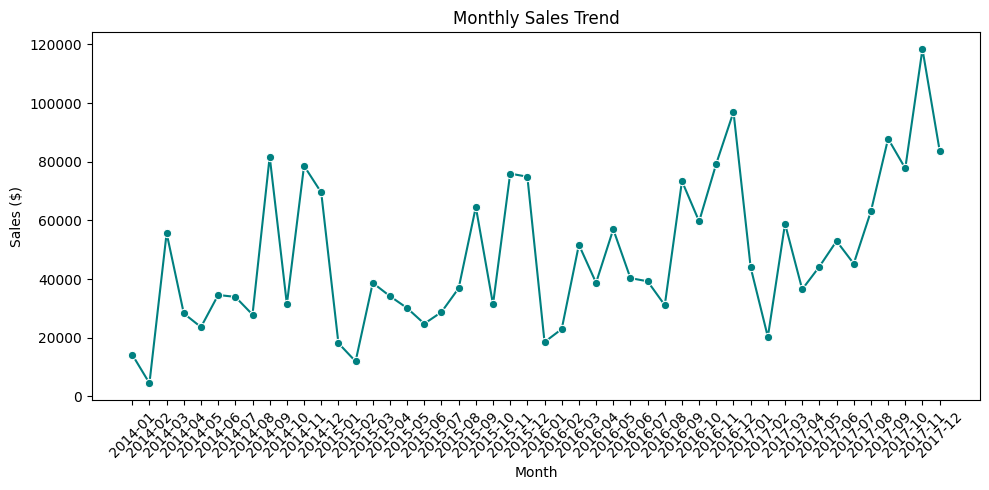

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

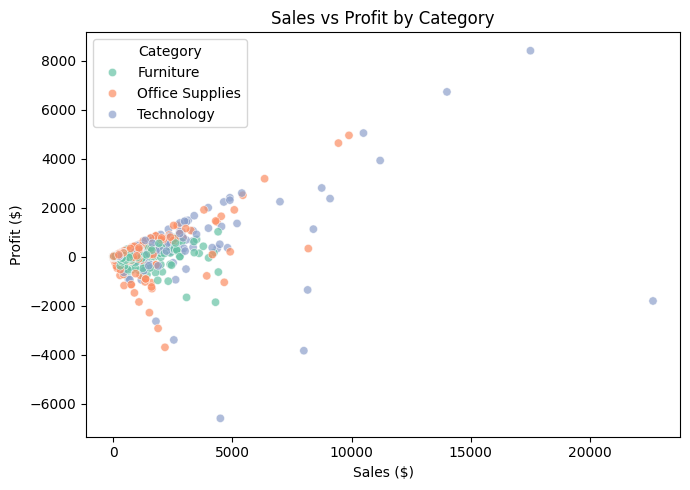

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7, palette='Set2')
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()


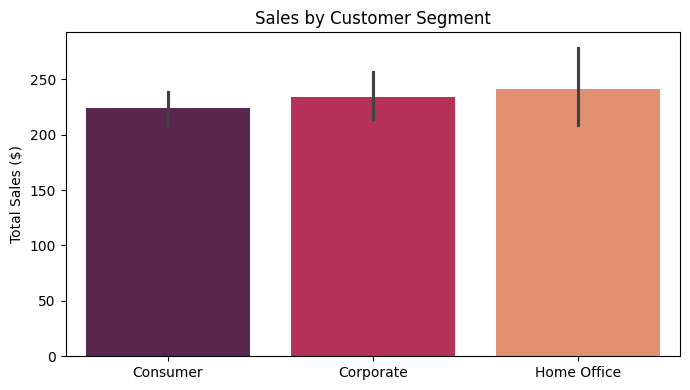

In [14]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Segment', y='Sales', palette='rocket')
plt.title("Sales by Customer Segment")
plt.xlabel("")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

In [15]:
df.to_csv("superstore_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as superstore_cleaned.csv")

✅ Cleaned dataset saved as superstore_cleaned.csv
